In [74]:
from dalila.dictionary_learning import StabilityDictionaryLearning
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from joblib import Parallel, delayed
import multiprocessing

In [ ]:
from utils import *

In [51]:
def process_input(k):
    print("NUMBER OF ATOMS: ", k)
    estimator = StabilityDictionaryLearning(k=k, non_negativity="both")
    estimator.fit(breast_data)
    C, D = estimator.decomposition()
    return C, D, estimator.stability, np.sum((breast_data - C.dot(D))**2)
    

In [ ]:
breast_data = np.load("/home/veronica/Desktop/UVM/matrices_all_cancer/breast_protected.npy")

num_cores = multiprocessing.cpu_count()
results = Parallel(n_jobs=num_cores)(delayed(process_input)(k) for k in range(2,10))




('NUMBER OF ATOMS: ', 3)
('NUMBER OF ATOMS: ', 2)
('NUMBER OF ATOMS: ', 6)
('NUMBER OF ATOMS: ', 8)
('NUMBER OF ATOMS: ', 9)
('NUMBER OF ATOMS: ', 4)
('NUMBER OF ATOMS: ', 5)
('NUMBER OF ATOMS: ', 7)
1
('Difference', 59.672797769975041)
2
('Difference', 0.020627245255065912)
3
('Difference', 0.0016344765593682977)
4
('Difference', 0.00067625154024355356)
5
('Difference', 0.0069304160890230095)
6
('Difference', 0.00044370695133617567)
7
('Difference', 0.00031231779402390587)
8
('Difference', 7.7710682217687141e-05)
1
('Difference', 86.155641023768837)
2
('Difference', 0.001555973469312705)
3
('Difference', 0.00030483218653795657)
4
('Difference', 0.017720953385727285)
5
('Difference', 0.0014711430186430821)
1
('Difference', 215.13365662411272)
6
('Difference', 0.0014932834391643804)
7
('Difference', 0.00029862229593068454)
8
('Difference', 0.0016486924348421803)
9
('Difference', 0.00054140619679747916)
1
('Difference', 118.64778355270363)
2
('Difference', 0.046595550783410447)
10
('Diff

In [59]:
Cs = []
Ds = []
stabilities = []
errors = []
for k in range(0,8):
    Cs.append(results[k][0])
    Ds.append(results[k][1])
    stabilities.append(results[k][2])
    errors.append(results[k][3])

[ 158.22213632  156.48648652  156.2673811   156.07236129  155.62456325]


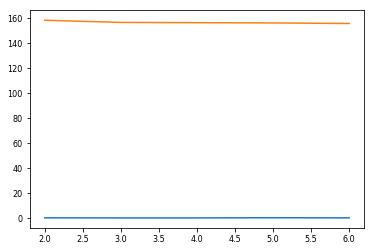

In [60]:
#plt.plot(np.arange(2,10), (errors/np.sum(breast_data)))
errors = errors/np.sum(breast_data)
print(errors)
plt.plot(np.arange(2,10), stabilities)
plt.plot(np.arange(2,10), errors)
plt.show()

In [61]:
D = Ds[3]
C = Cs[3]
print(D.shape)
print(C.shape)
print(C)

(5, 96)
(1049, 5)
[[  29.10099854   66.69230784  158.81625838   41.60600266   23.59603729]
 [  29.60978402   65.61830503   33.62552389   72.48300643   19.58617501]
 [  25.39359972   51.67347474   86.63141038   52.04177436   11.44817204]
 ..., 
 [  19.81058511   46.42037756   80.01559115   66.30220803   14.01270638]
 [  44.40313594   83.87044117   95.28264589   43.84114921   24.4691418 ]
 [  38.48758365   53.25715548   90.80827963   90.04910322  269.87022019]]


In [62]:
percentages = np.zeros_like(C)

for sample in range(C.shape[0]):
    total = np.sum(C[sample,:])
    if(total != 0):
        percentages[sample,:] = C[sample, :] / total 

print(percentages)

[[ 0.09099419  0.20853623  0.49659317  0.13009535  0.07378105]
 [ 0.13402775  0.29701917  0.15220486  0.32809202  0.0886562 ]
 [ 0.1117733   0.22744765  0.38131964  0.22906877  0.05039065]
 ..., 
 [ 0.08744022  0.20489088  0.35317387  0.29264556  0.06184947]
 [ 0.15213508  0.2873589   0.32645967  0.15020959  0.08383676]
 [ 0.07094847  0.09817488  0.16739707  0.16599759  0.49748199]]


In [63]:
max_indices = np.zeros((percentages.shape[1]))
max_values = np.zeros((percentages.shape[1]))

for atom in range(percentages.shape[1]):
    max_indices[atom] = np.argmax(percentages[:,atom])
    max_values[atom] = percentages[int(max_indices[atom]), atom]

In [64]:
def plot(dictionary, sample):
    # get all mutations with context
    features = np.load("/home/veronica/Desktop/UVM/mutation_signatures/datasets/features.npy")
    # atoms normalization
   # for r in range(dictionary.shape[0]):
     #   dictionary[r, :] /= np.sum(dictionary[r, :])

    cm = plt.cm.get_cmap('RdYlBu_r')
    colors = cm(np.linspace(0, 1, 6))

    _max = np.amax(np.amax(dictionary, axis=0)) + 0.05
    cols = 1
    rows = dictionary.shape[0]

    # start plot
    fig = plt.figure(figsize=(15, 10))

    #for k in range(dictionary.shape[0]):
    length = len(dictionary)
    x = np.arange(0, length)
    w = dictionary
    #ax = fig.add_subplot(rows, cols, k + 1)

    #if k == 0:  # saving first subplot for legend
     #   ax1 = ax

    weights = np.zeros(6)
    for j in range(6):
        i1 = 16 * j
        i2 = 16 * (j + 1)
        weights[j] = np.sum(w[i1:i2])

    N, bins, patches = plt.hist(x, bins=length, weights=w)
    width = patches[1].get_width()
    points = np.linspace(0, 95, 6)
    for k in range(6):
        plt.axvline(x=16*(k+1)*width, color='k', linestyle='dashed',
                   linewidth=1)

    N1, bins1, patches1 = plt.hist(x, bins=length, weights=sample,
                                   alpha=0.5)
    plt.xlim((0, 96))
    plt.ylim((0, _max))
    plt.xticks(bins+patches[0].get_width()/2 , features, rotation='vertical')
    rcParams.update({'font.size': 8})

    # colors labels
    labels = ["C>A", "C>G", "C>T", "T>A", "T>C", "T>G"]
    for bin_size, _bin, patch in zip(N, bins, patches):
        for l in range(6):
            patches[16*(l+1)-1].set_label(labels[l])
            if _bin < 16 * (l+1)-1:
                patch.set_facecolor(colors[l])
                break
    cm = plt.cm.get_cmap('PRGn_r')
    colors = cm(np.linspace(0, 1, 6))
    for bin_size, _bin, patch in zip(N1, bins1, patches1):
        for l in range(6):
            patches1[16*(l+1)-1].set_label(labels[l])
            if _bin < 16 * (l+1)-1:
                patch.set_facecolor(colors[l])
                break

    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='center',
               ncol=6,  mode='expand', borderaxespad=15.,
               numpoints=6, fontsize='xx-large')
    plt.tight_layout()
    plt.subplots_adjust(top=0.94)
    plt.show()

('The percentages of usage is: ', 0.60689393504565181)


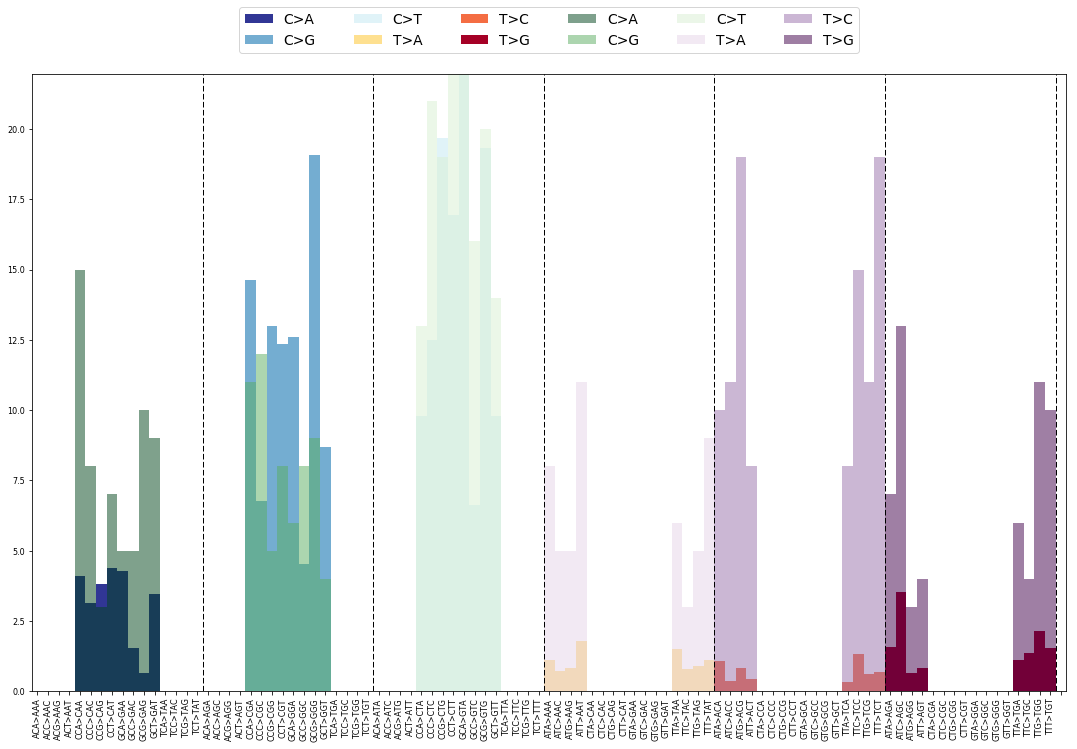

In [65]:
atom=3
print("The percentages of usage is: ", max_values[atom])

sample = breast_data[int(max_indices[atom]), :]

plot(D[atom,:]*C[int(max_indices[atom]), atom], sample)
    

(1049, 5)
[  49.  553.  755.  167.   24.]


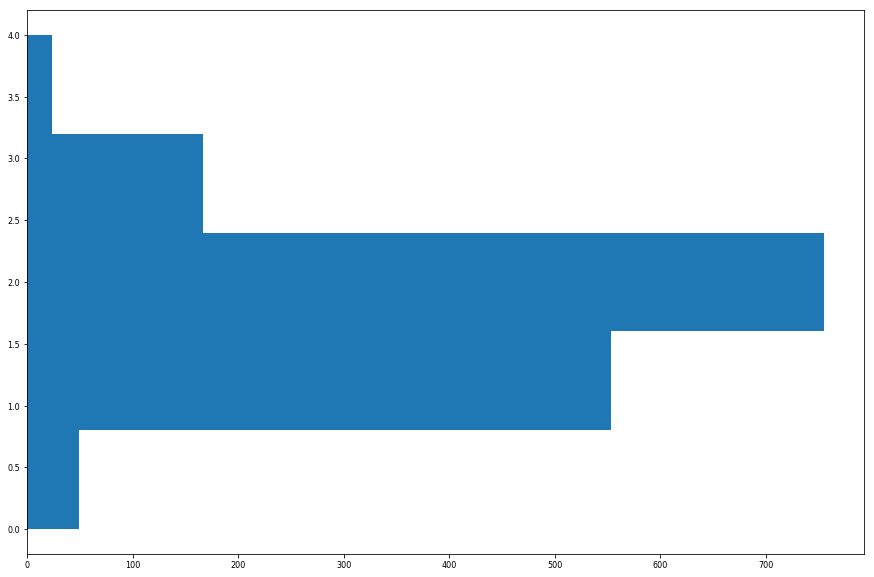

In [66]:
percentages[np.where(percentages<0.25)] = 0
frequencies = np.zeros(5)
print(percentages.shape)
for atom in range(percentages.shape[1]):
    frequencies[atom]= len(np.nonzero(percentages[:,atom])[0])
print(frequencies)
plt.figure(figsize=(15,10))
plt.hist(np.arange(5),weights=frequencies, bins=5, orientation="horizontal");
plt.show()

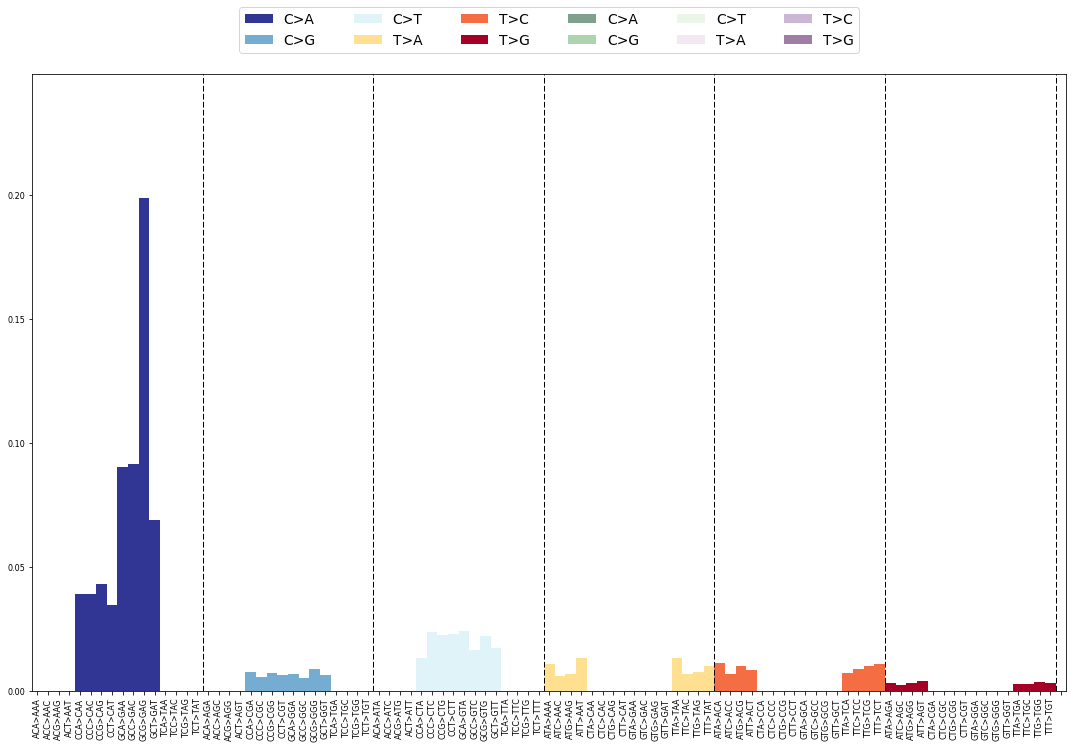

In [72]:
plot(D[4,:], np.zeros(96))